# Movement and signal

In this notebook, we show an example of how the plugin can be used to find interesting correlations between cell displacement and intensity variations. For this we use a dataset from the Pertz Lab at the University of Bern in which a protein is recruited to the cell membrane by photoactivation, leading then the cell to move in the direction of that signal.

We first load the data as usual:

In [1]:
%load_ext autoreload
%autoreload 2

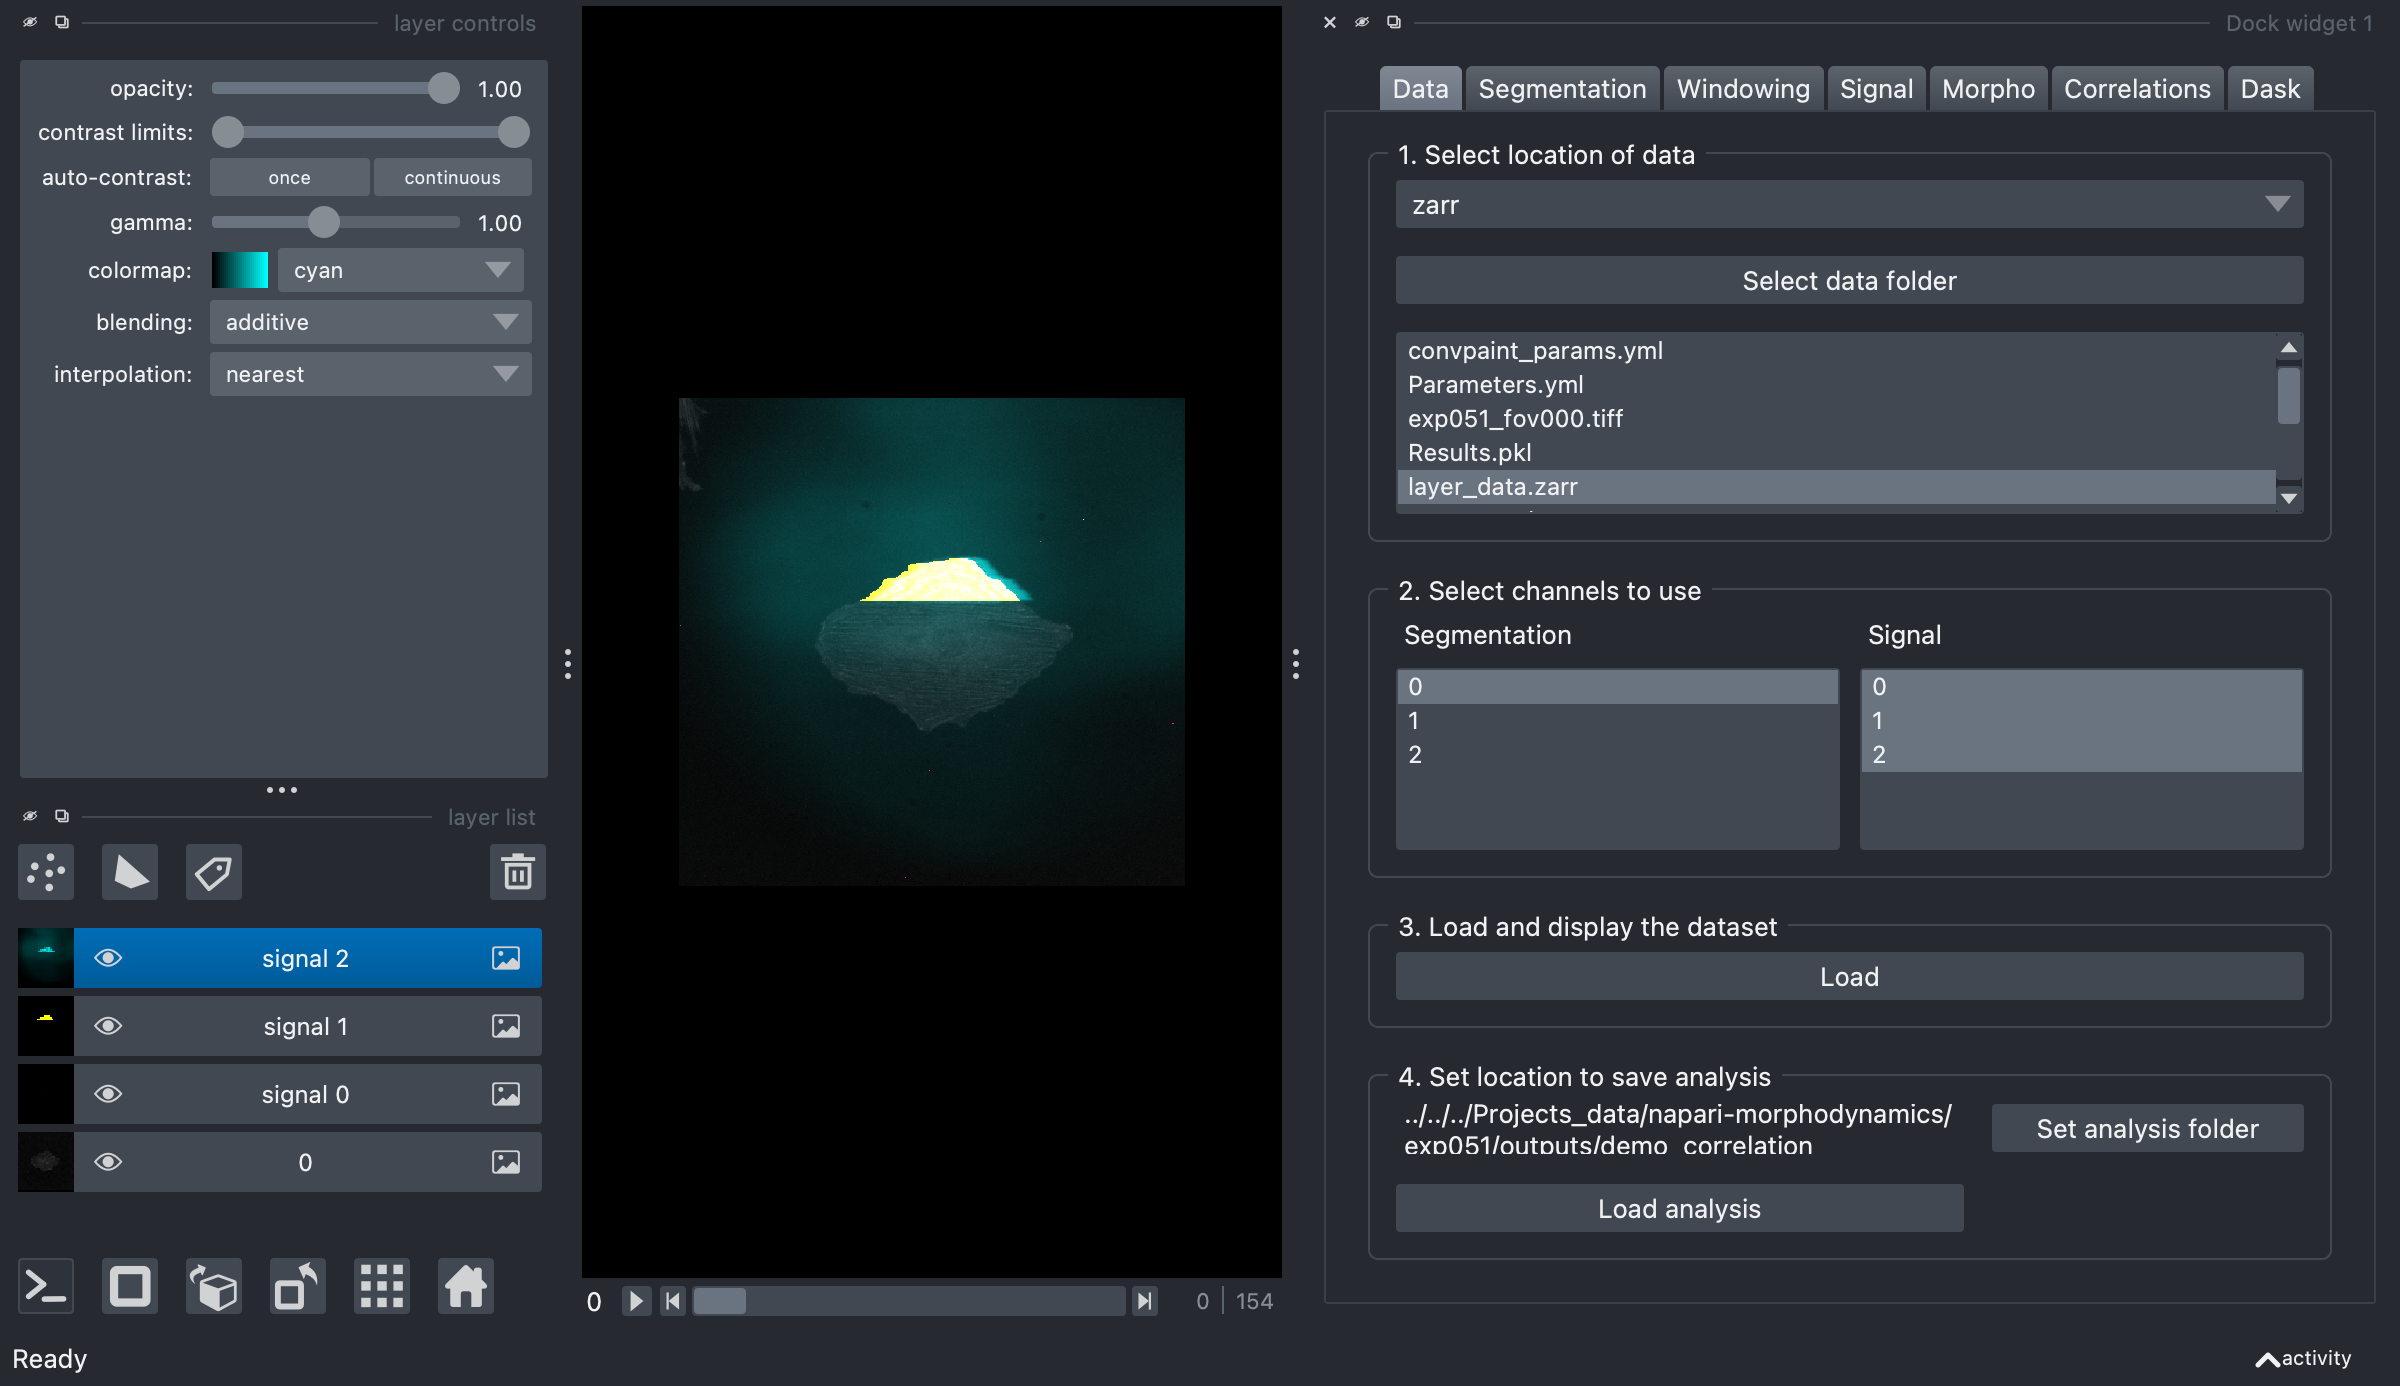

In [6]:
import napari
import skimage
import numpy as np
from napari.utils import nbscreenshot
from napari_morphodynamics.napari_gui import MorphoWidget
from qtpy.QtWidgets import QLabel, QSizePolicy

viewer = napari.Viewer()
viewer.window.resize(1200,400)
self = MorphoWidget(viewer)

self.setMaximumWidth(550)

viewer.window.add_dock_widget(self)

self._on_click_select_file_folder(
    file_folder='../../../Projects_data/napari-morphodynamics/exp051/layer_data.zarr/')
self.segm_channel.setCurrentRow(0)
for i in range(3):
    self.signal_channel.item(i).setSelected(True)
self._on_load_dataset()
self.viewer.dims.current_step = (0,0,0)
self.viewer.camera.zoom = 1.5

self._on_click_select_analysis(analysis_path='../../../Projects_data/napari-morphodynamics/exp051/outputs/demo_correlation/')
nbscreenshot(viewer)

Here the first channel tracks the cytoskeleton (actin), the second one highly shows photoactivation, while the last one shows the protein recruited by photoactivation. As we can see below, a few frames later the cell has moved towards the top and our goal is to capture that correlation.

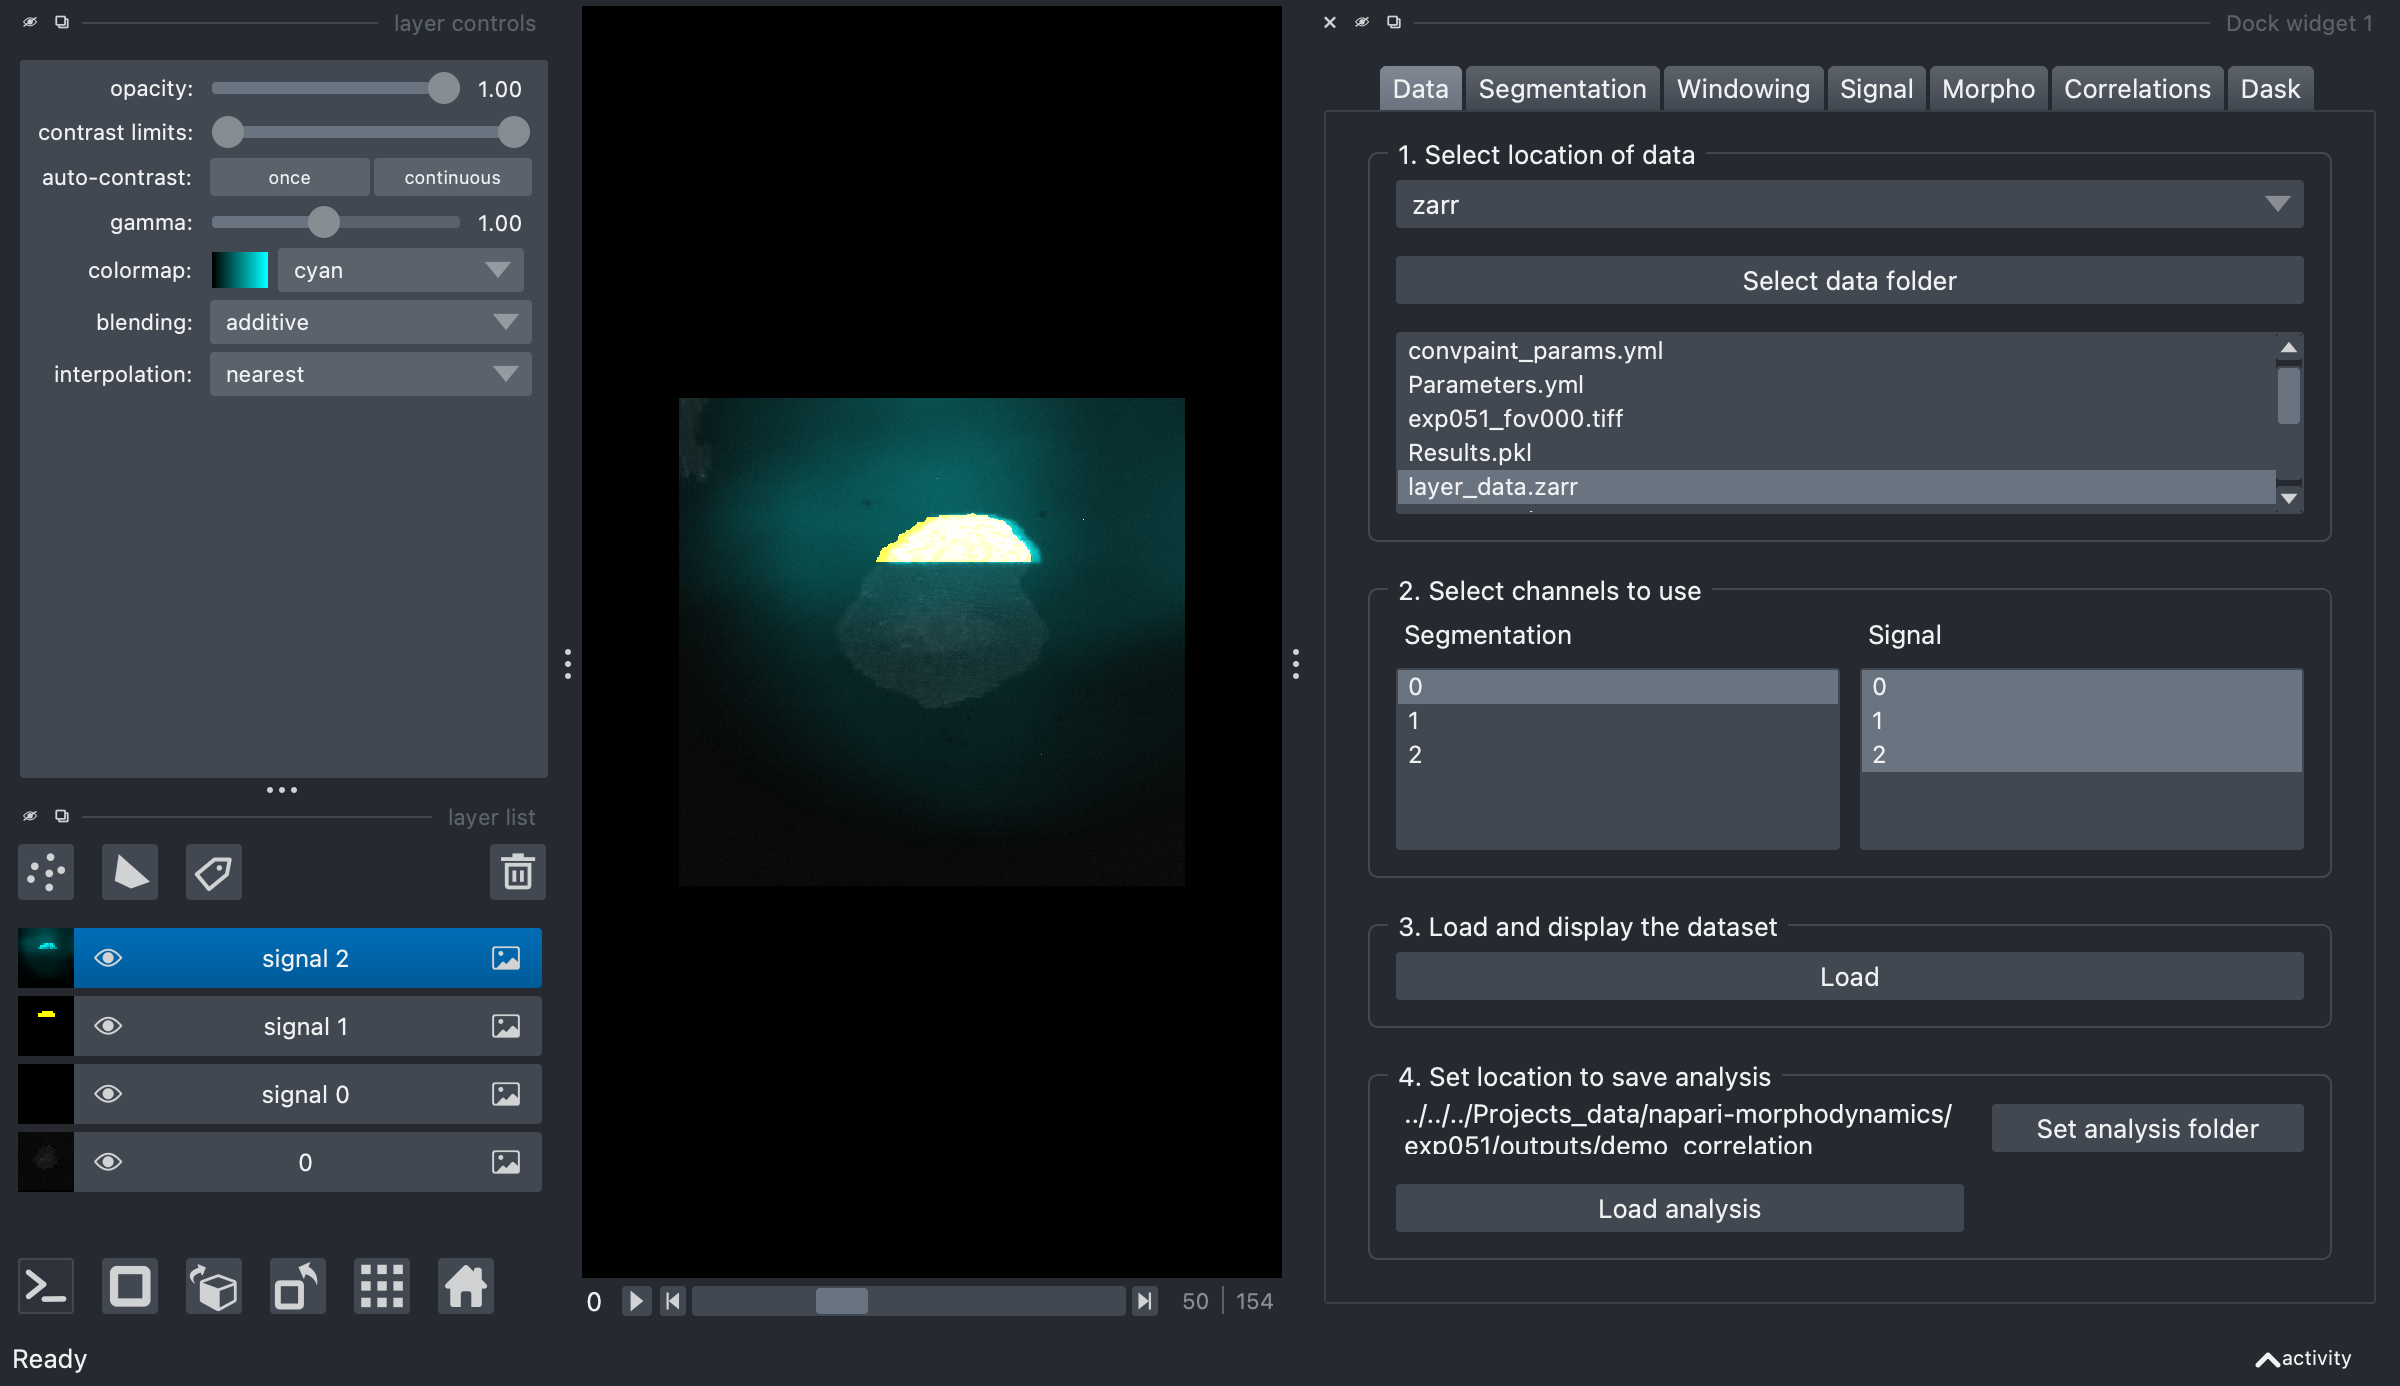

In [7]:
self.viewer.dims.current_step = (50,0,0)
nbscreenshot(viewer)

## Segmentation

To show an alternative to convpaint, we perform segmentation with cellpose here. We have in particular to specify the cell size:

In [ ]:
self.tabs.setCurrentIndex(1)
self.seg_algo.setCurrentText('cellpose')
self.cell_diameter.setValue(150)
self._on_run_segmentation()

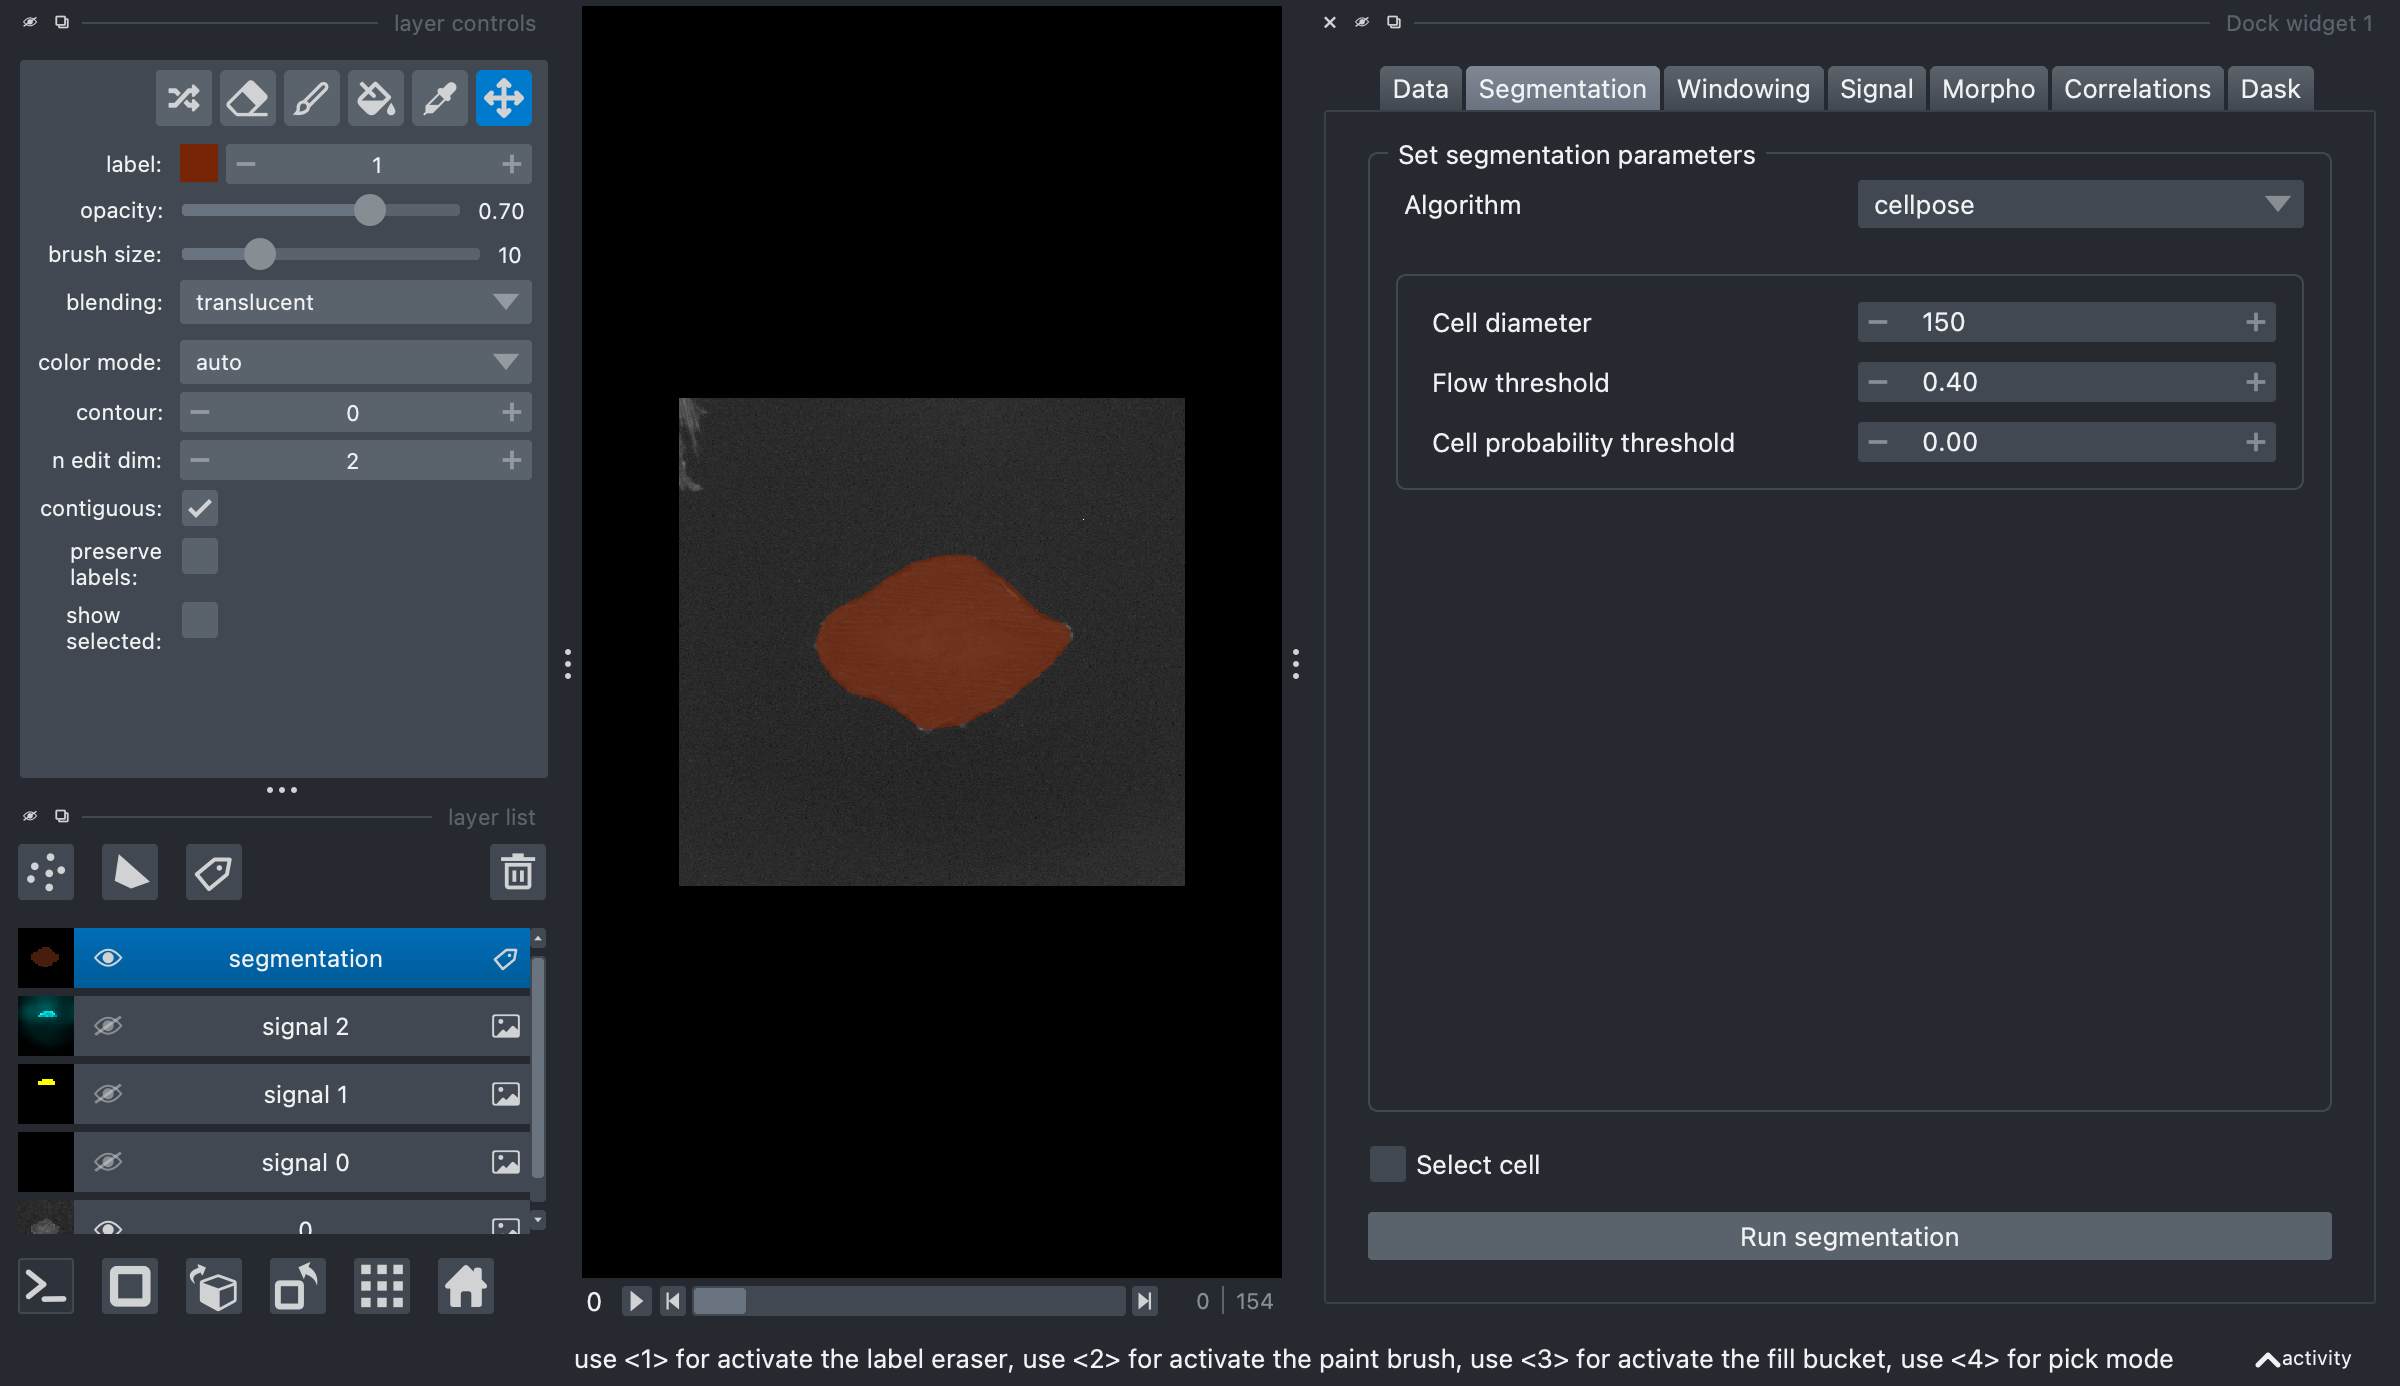

In [9]:
nbscreenshot(viewer)

Now we can proceed with windowing. We keep the default window sizes here:

frames compute windows:   0%|                                    | 0/155 [00:00<?, ?it/s]/Users/gw18g940/GoogleDrive/BernMIC/Projects/MorphoDynamics/morphodynamics/analysis_par.py:457: RuntimeWarning: invalid value encountered in cast
  skimage.io.imsave(name2, b0.astype(np.uint8), check_contrast=False)
frames compute mapping: 100%|██████████████████████████| 154/154 [00:47<00:00,  3.25it/s]


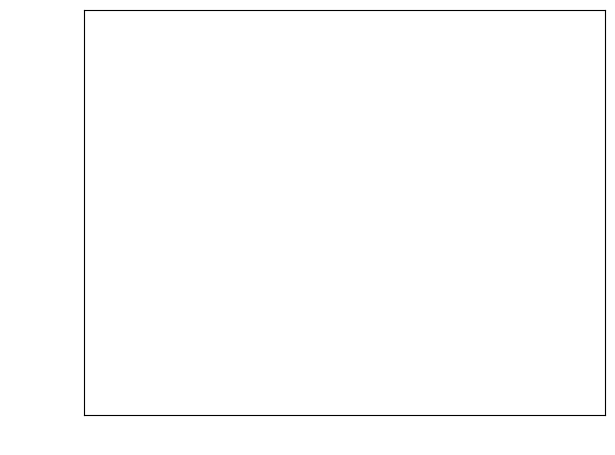

In [10]:
self.tabs.setCurrentIndex(2)
self._on_run_spline_and_window()

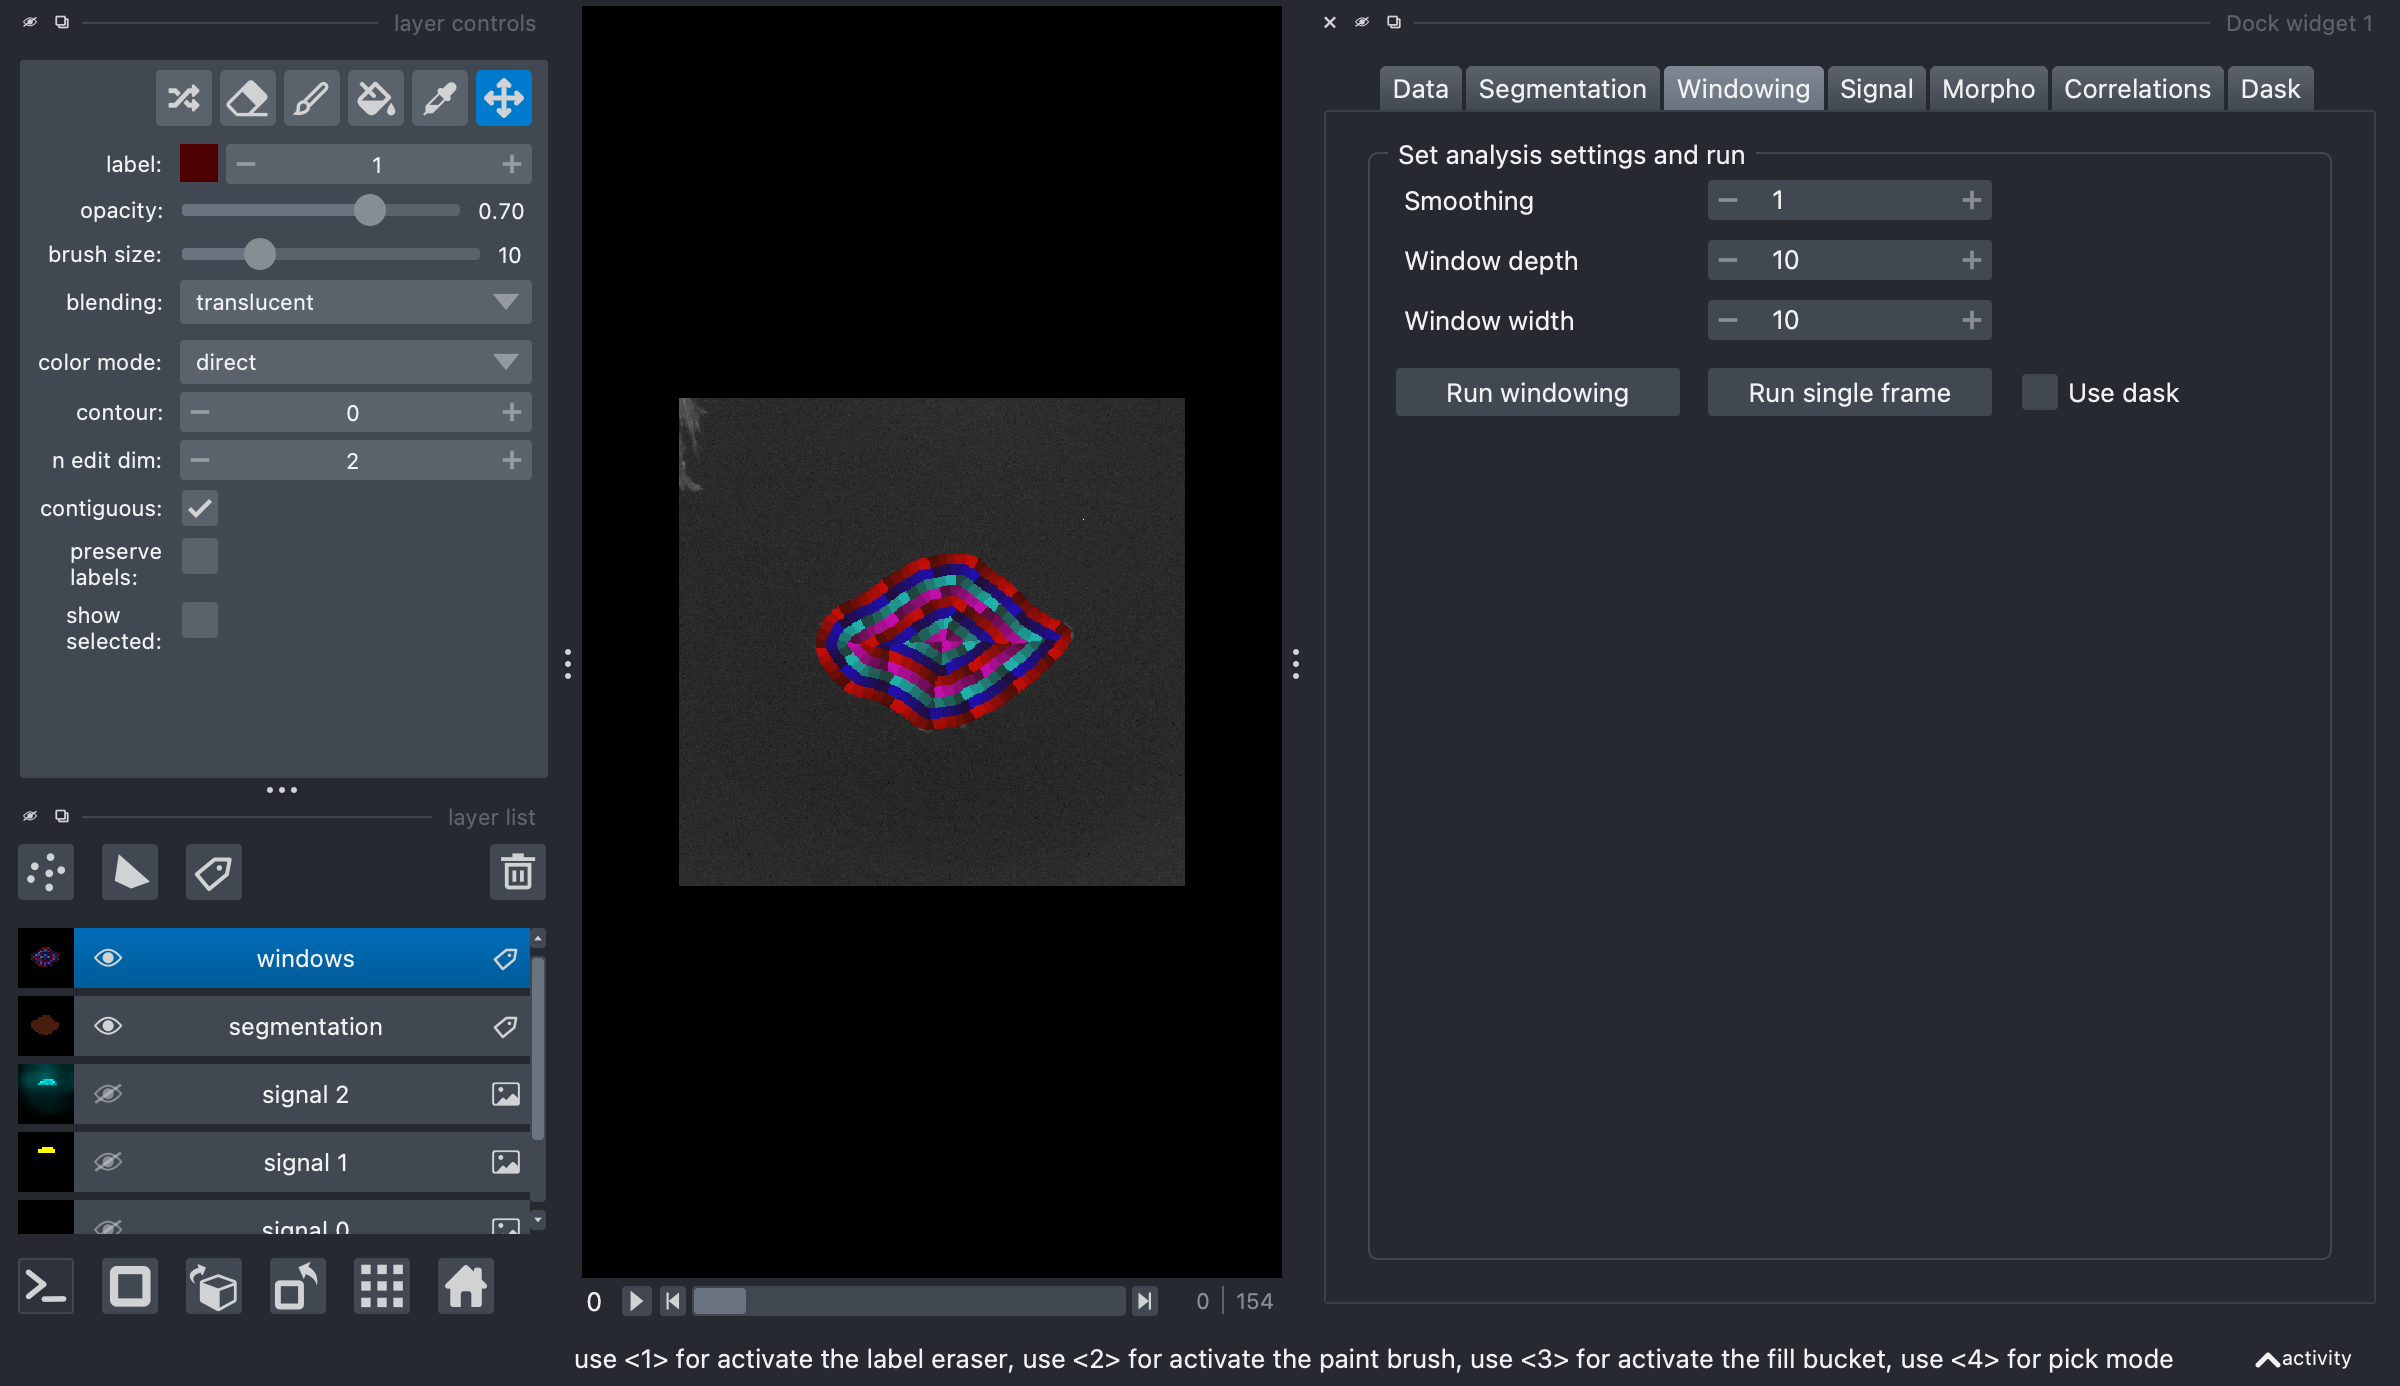

In [11]:
nbscreenshot(viewer)

## Photoactivation

We can first verify that we do have accumulation of the protein on the cell edge by looking at the time evolution of the intensity in the outermost series of windows:

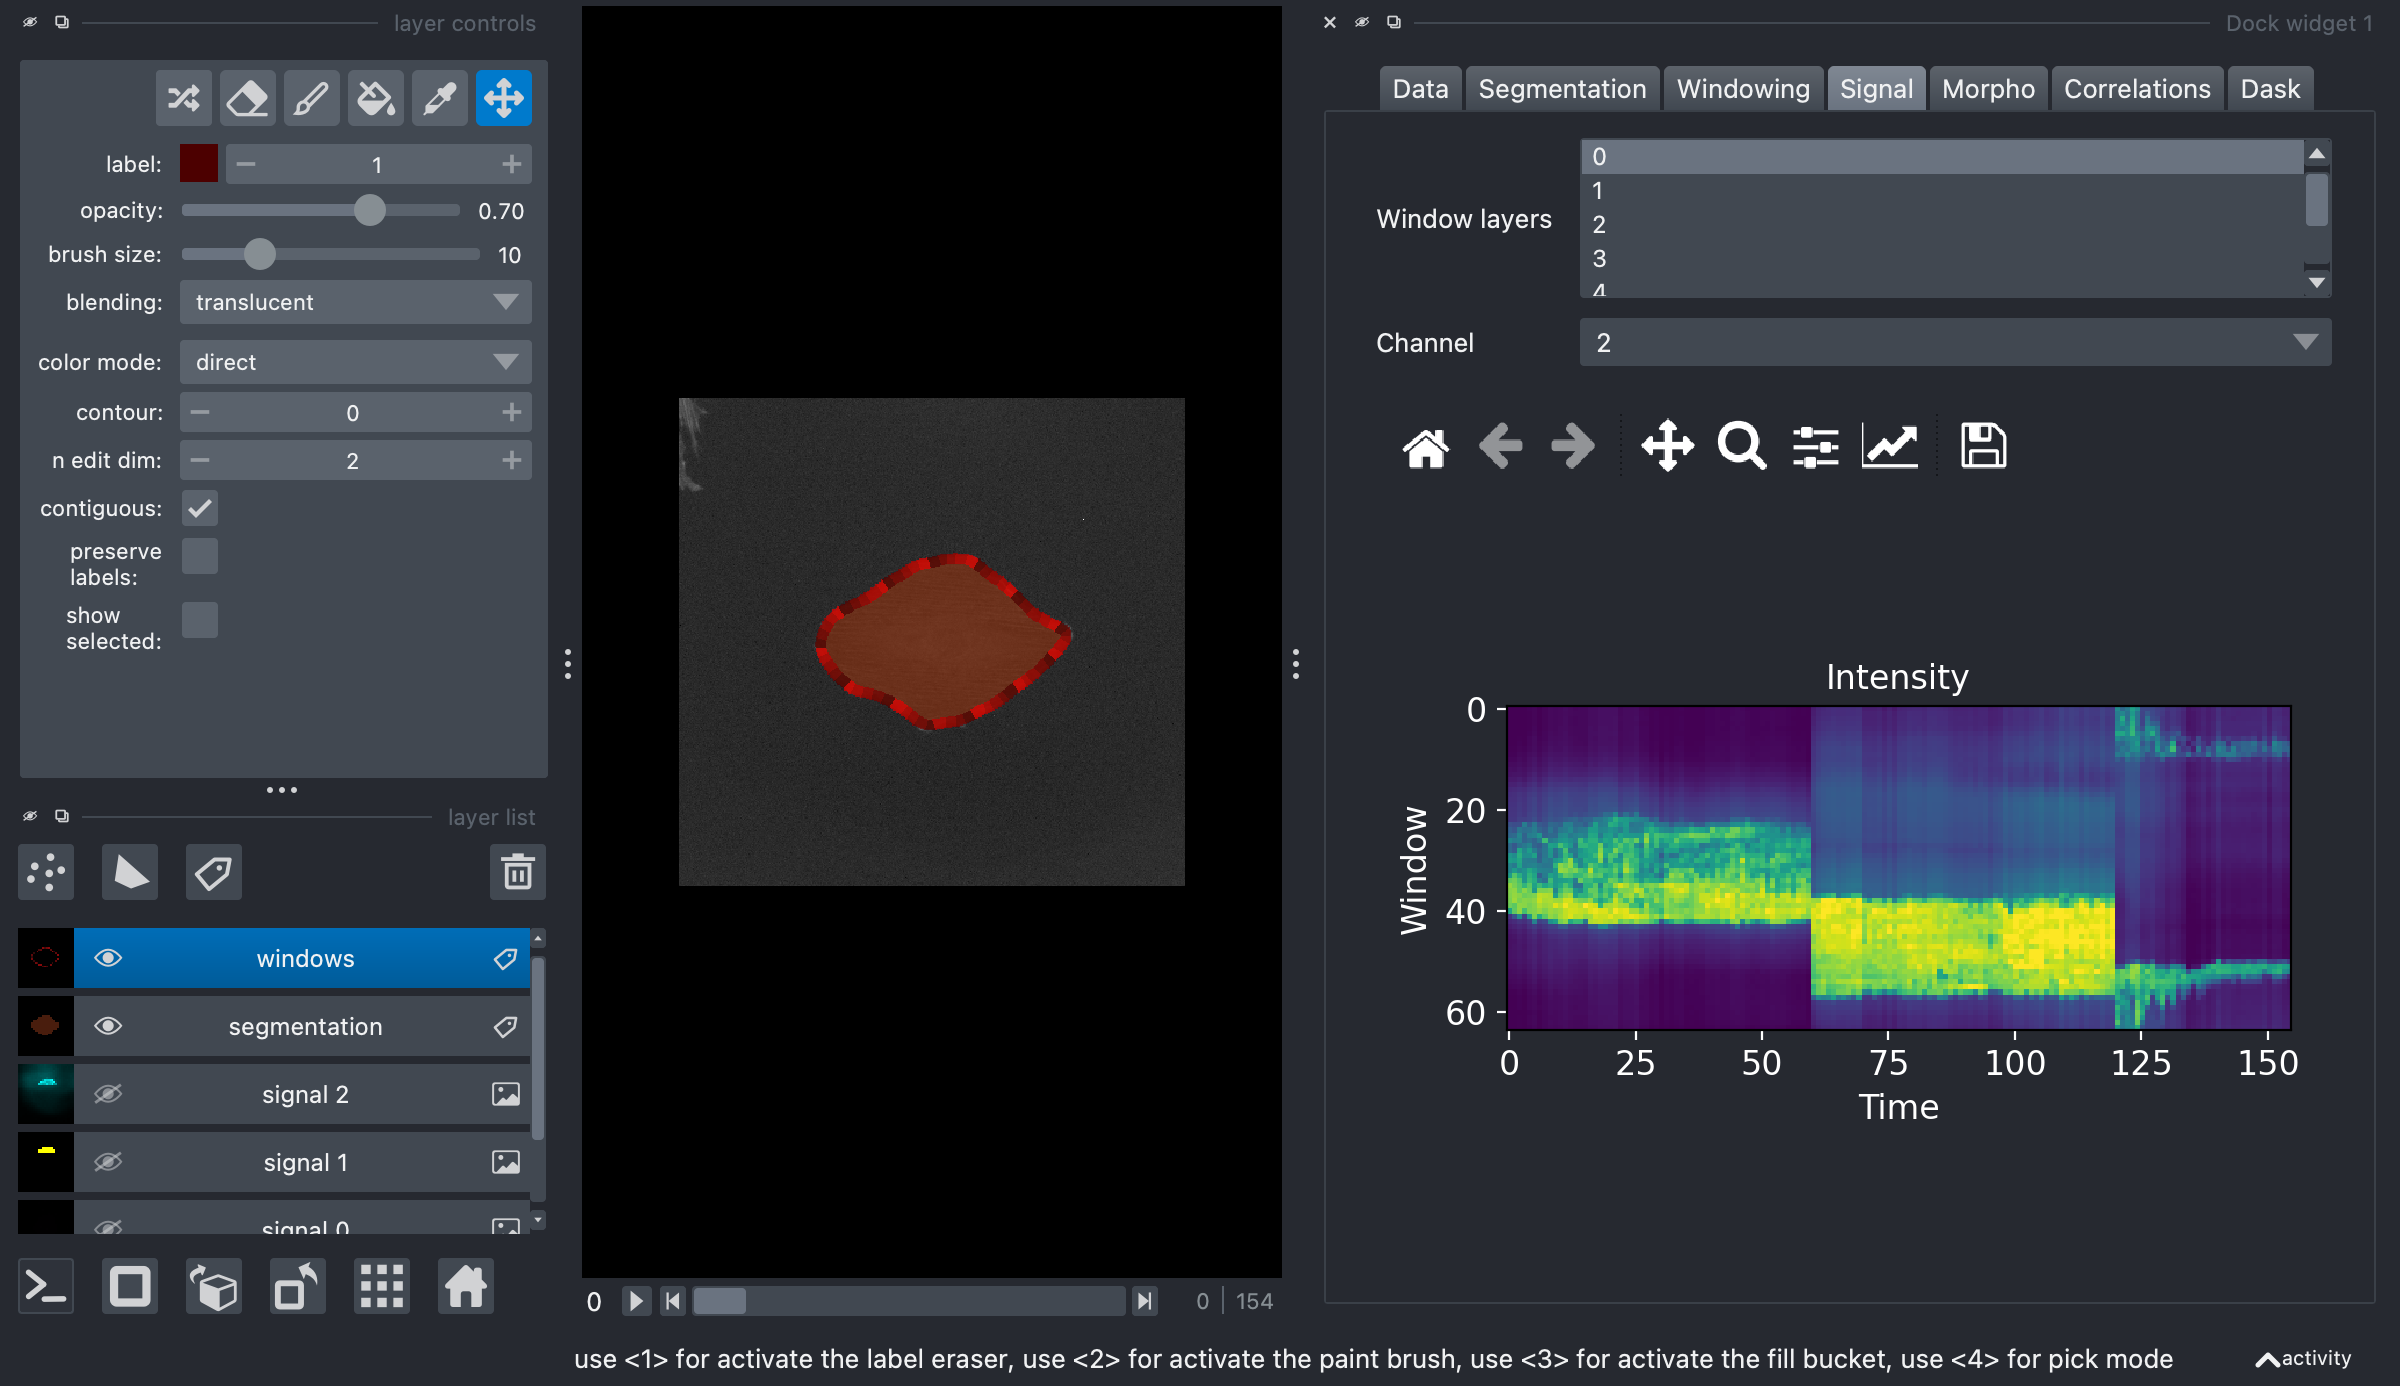

In [15]:
self.tabs.setCurrentIndex(3)
self.display_wlayers.setCurrentRow(0)
self.combo_channel.setCurrentText('2')
nbscreenshot(viewer)

We clearly see that consequence of activation in this plot. In particular we see the the change of the activation location at time ~60 and ~120.

We can also check that the cell does move when activated by looking at the cumulative displacement plot:

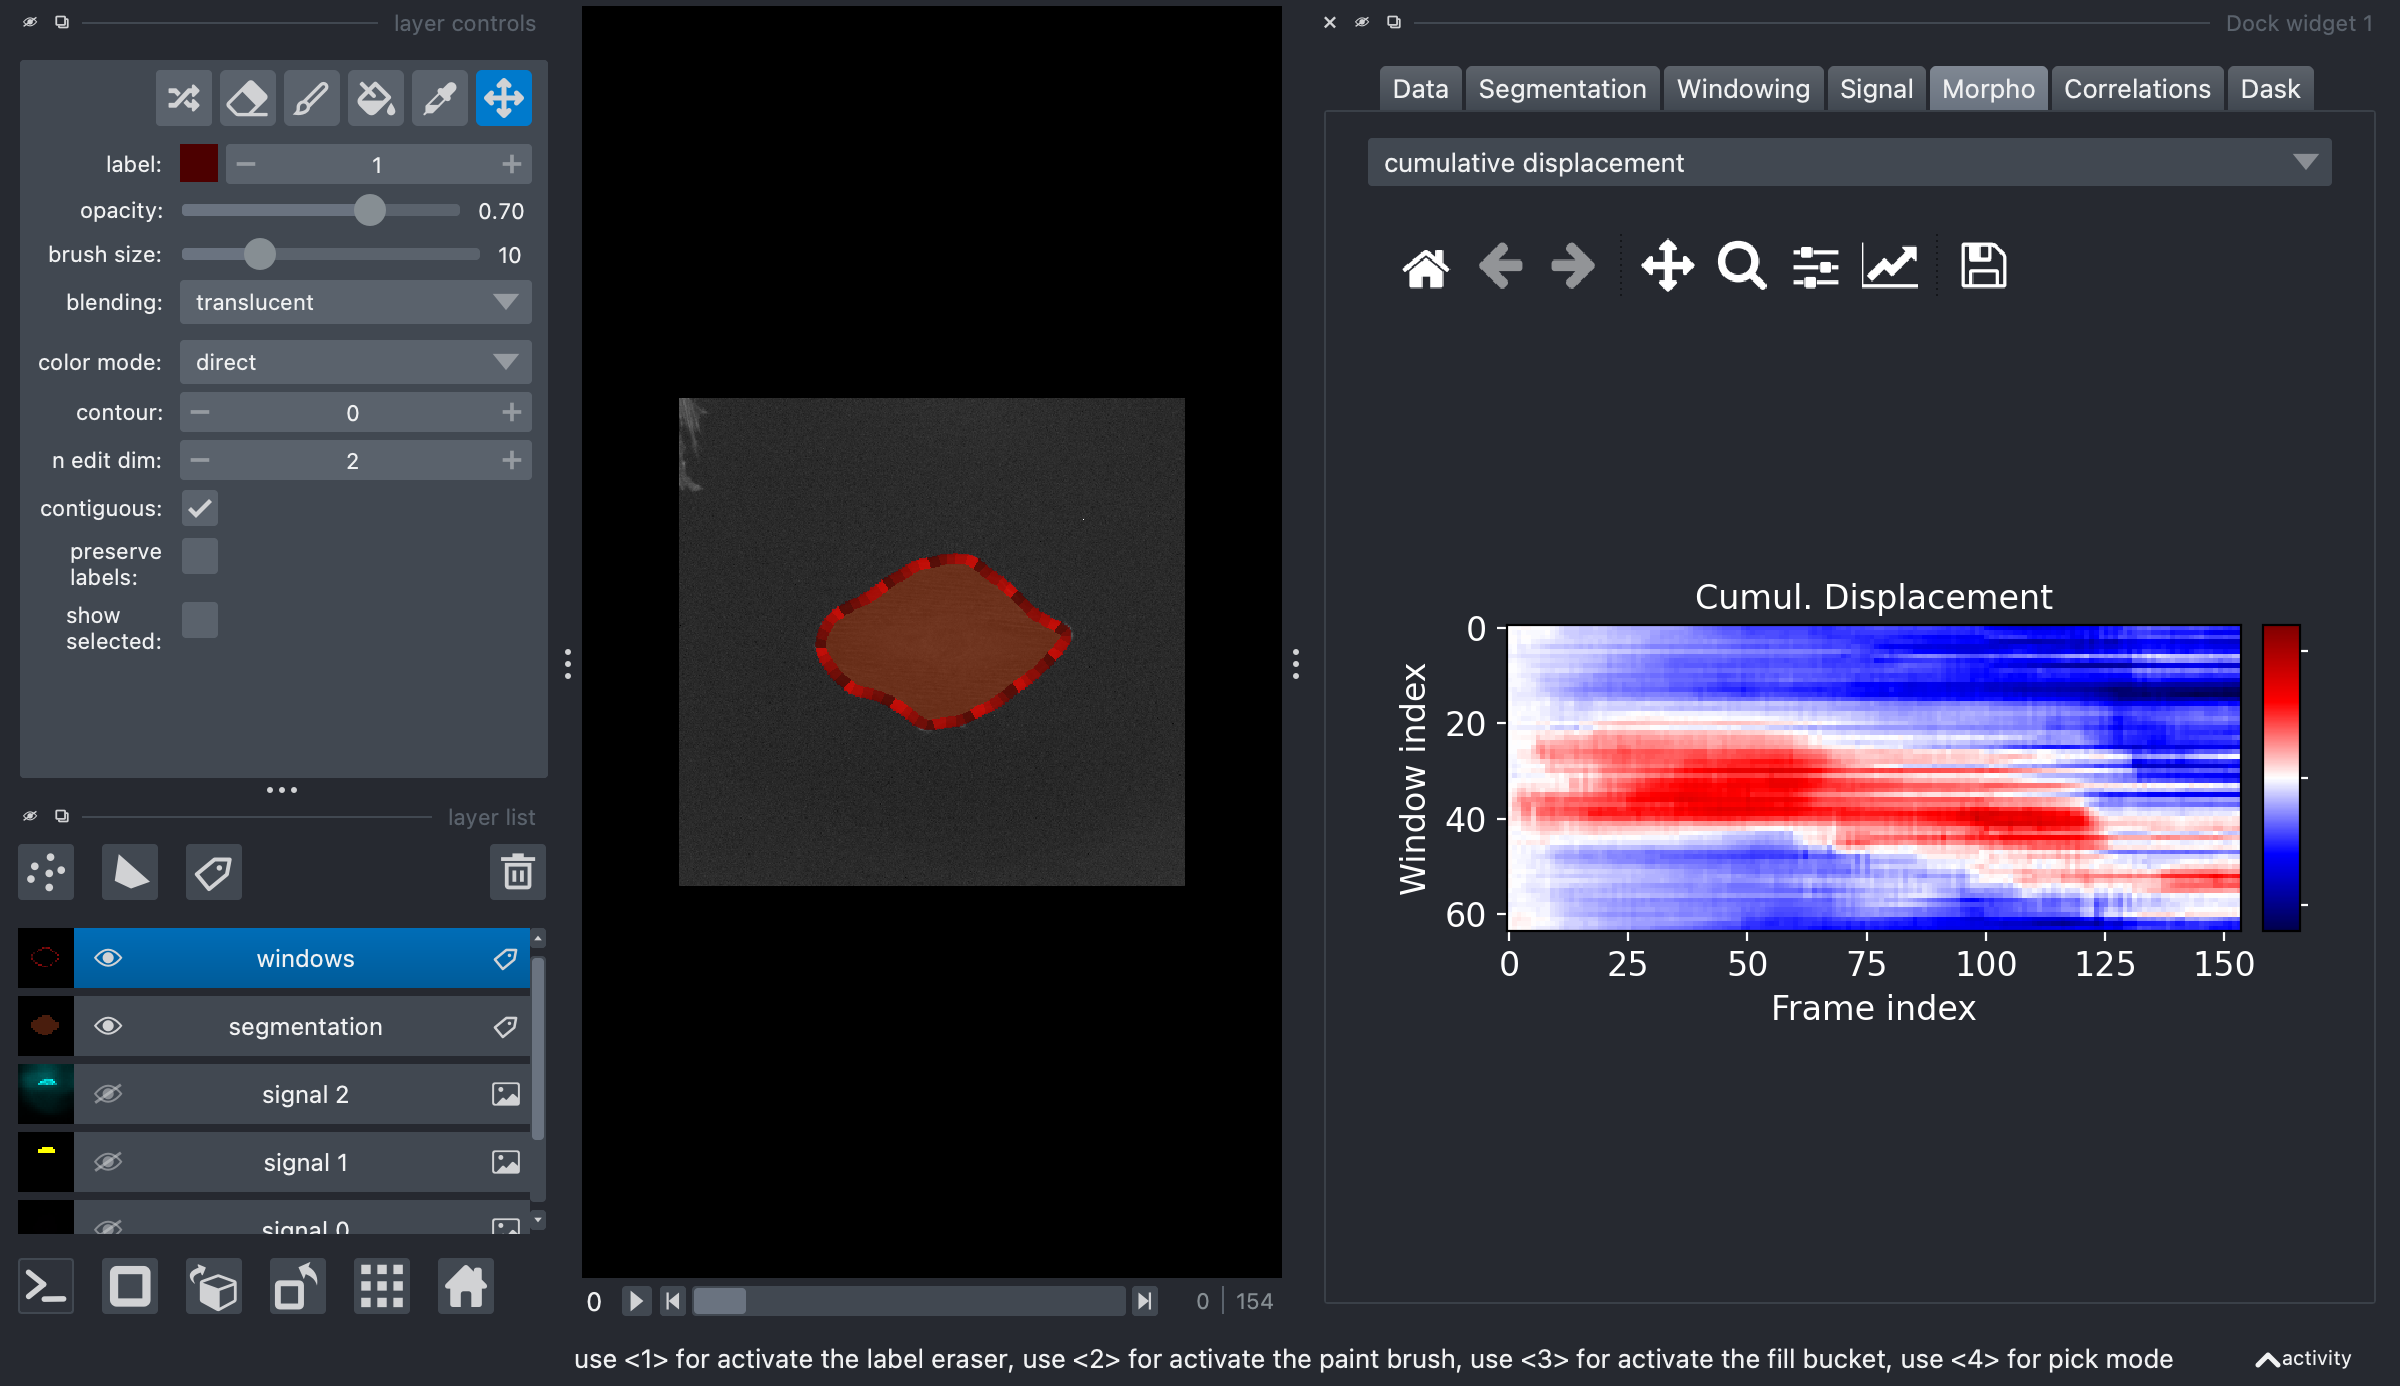

In [17]:
self.tabs.setCurrentIndex(4)
self.drop_choose_plot.setCurrentIndex(1)
nbscreenshot(viewer)

We clearly see that the windows 20-30 are extending up to frame 60 while then it is another region around 35-45 that moves until the next light pulse.

What about the correlation between the movement and the activation? Does the cell move as soon as activation happens or is there a delay. We can study this via the correlation plot:

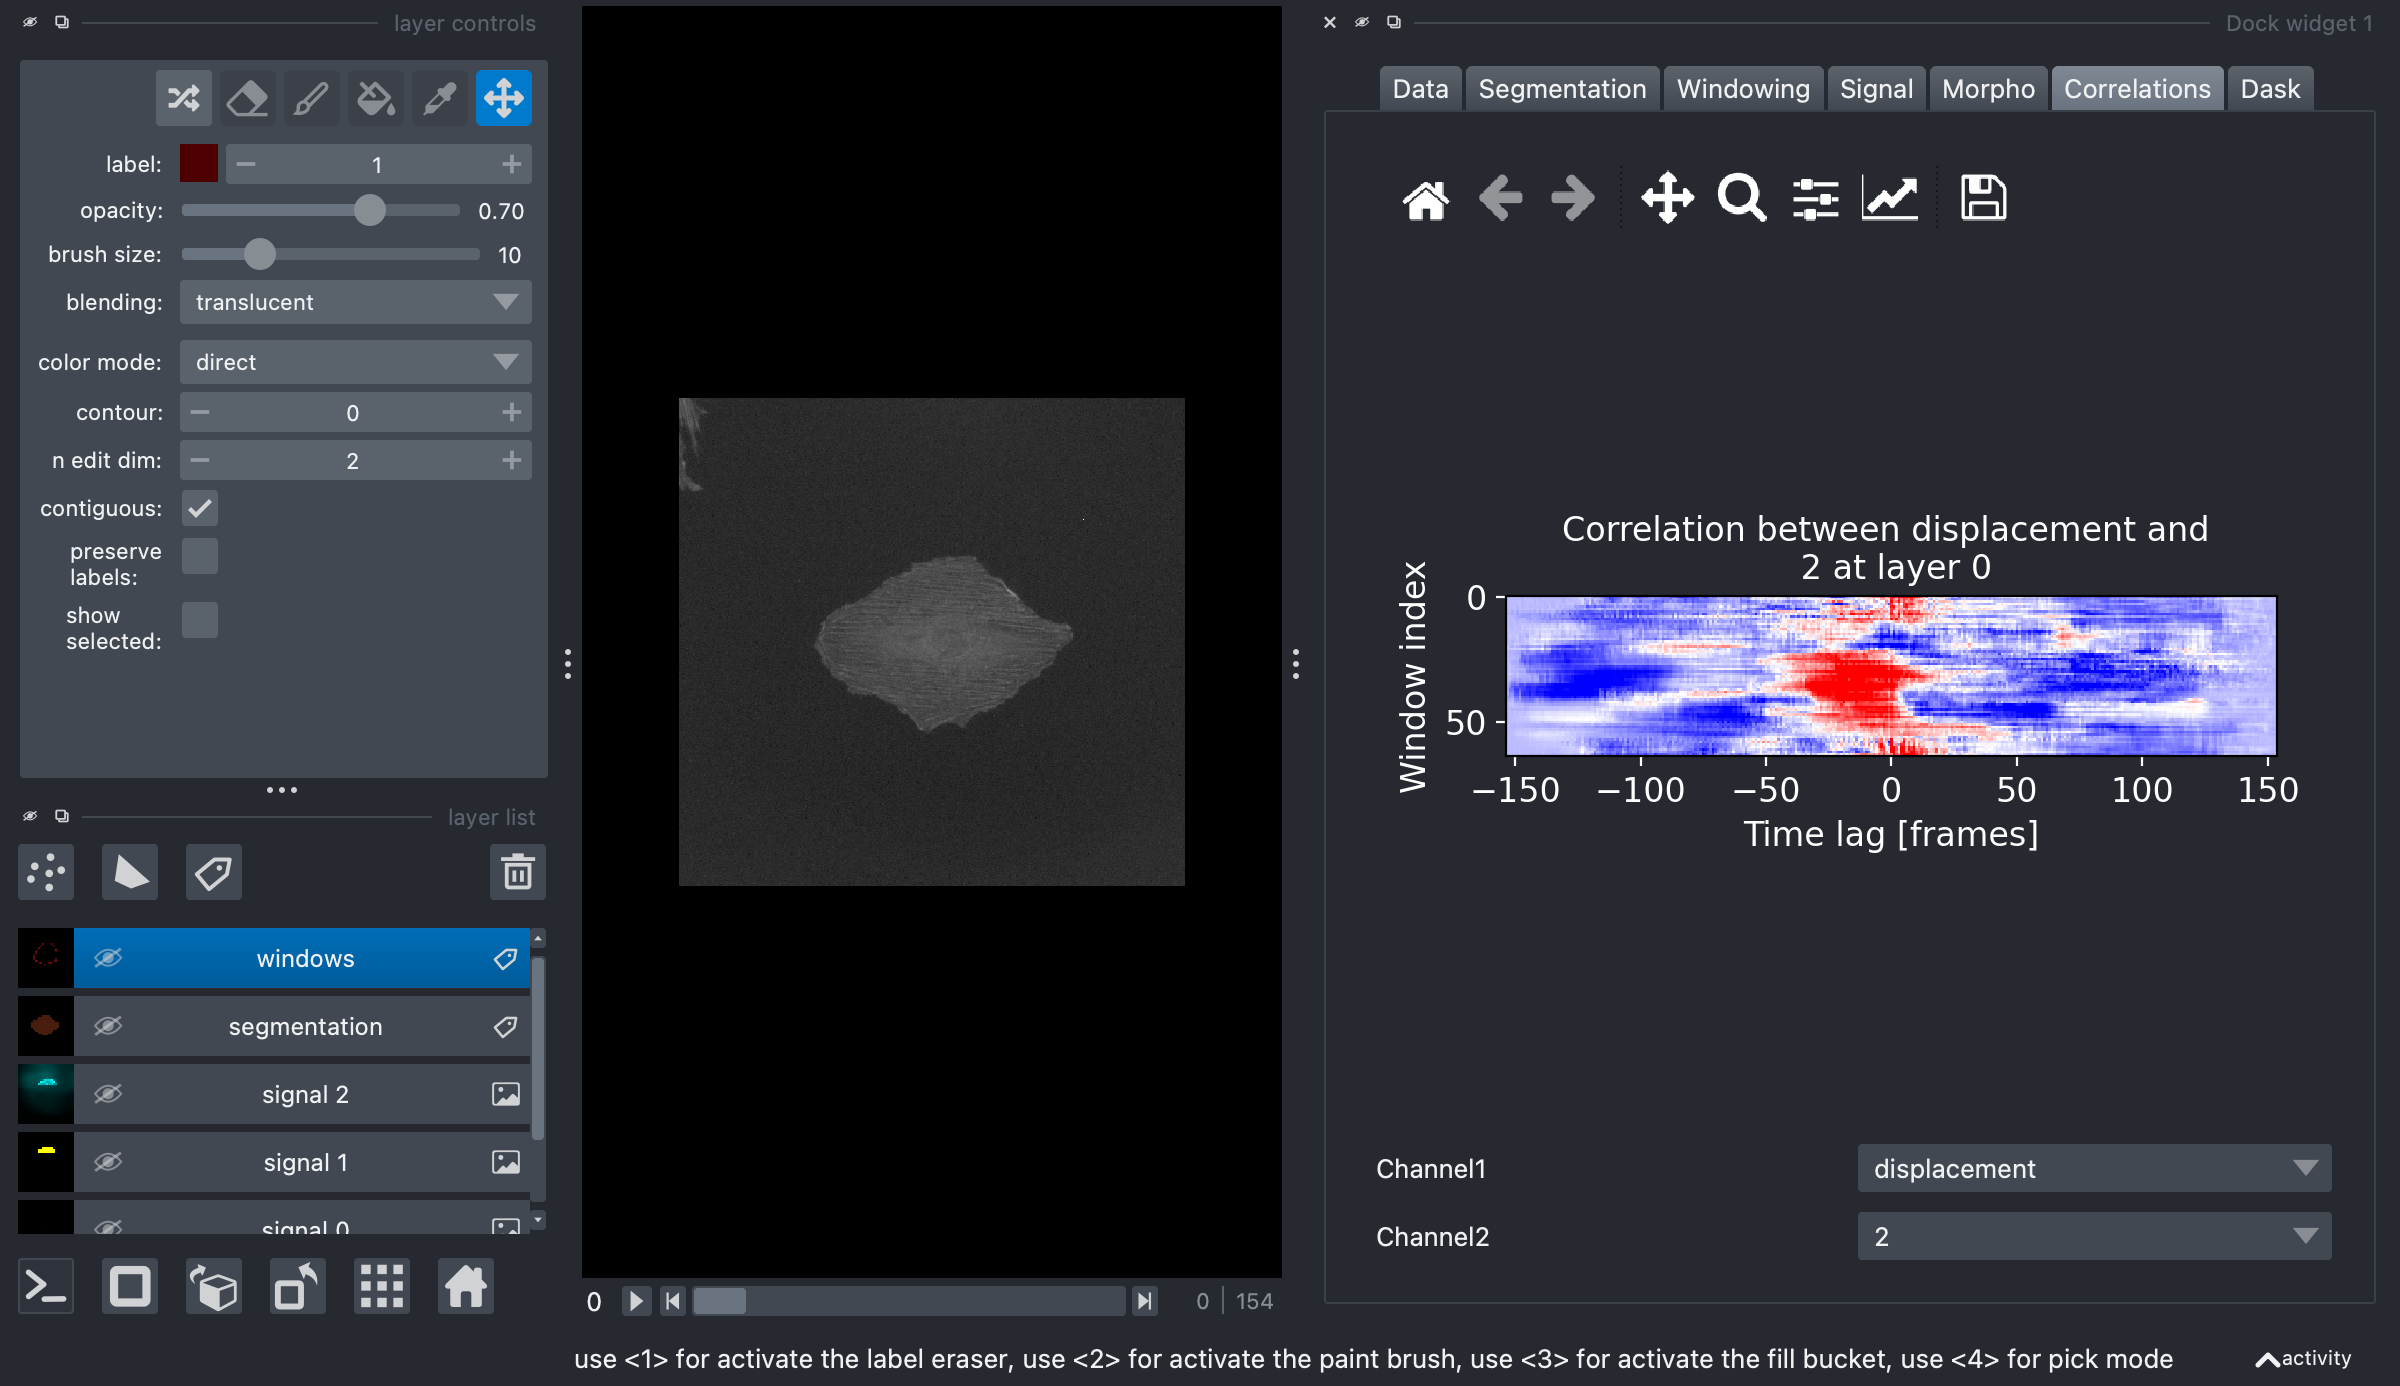

/Users/gw18g940/GoogleDrive/BernMIC/Projects/MorphoDynamics/morphodynamics/plots/show_plots.py:108: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


In [19]:
self.tabs.setCurrentIndex(5)
self.combo_channel_correlation2.setCurrentIndex(2)
self.combo_channel_correlation1.setCurrentText('displacement')
nbscreenshot(viewer)

We see that for the affected regions ~20-50 there is a significant correlation between displacement and signal. Also the correlation occurs with a time lag of approximately 15 frames as seen in the shift of the red region to the left.

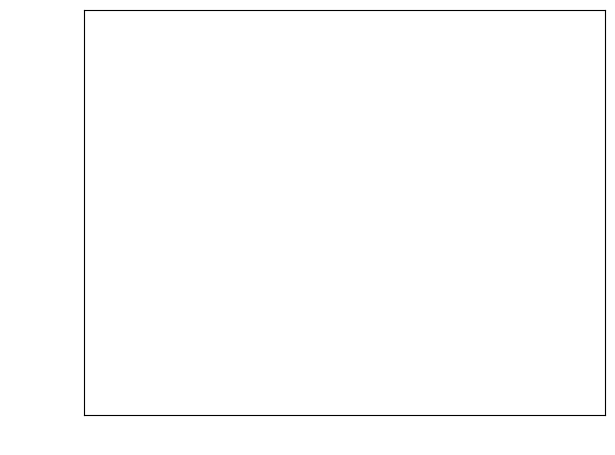

In [20]:
self.correlation_plot.canvas.figure.set_facecolor('white')
for ax in self.correlation_plot.canvas.figure.axes:
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.title.set_color('black')
    ax.tick_params(colors='black')
self.correlation_plot.figure.savefig('images/correlation.png')

In [21]:
self.intensity_plot.canvas.figure.set_facecolor('white')
for ax in self.intensity_plot.canvas.figure.axes:
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.title.set_color('black')
    ax.tick_params(colors='black')
#self.intensity_plot.canvas.figure.axes[0].set_xlim(0,150)
self.intensity_plot.figure.savefig('images/intensity.png')

In [23]:
self.displacement_plot.canvas.figure.set_facecolor('white')
for ax in self.displacement_plot.canvas.figure.axes:
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.title.set_color('black')
    ax.tick_params(colors='black')
    ax.yaxis.label.set_fontsize(8)
#self.displacement_plot.canvas.figure.axes[0].set_xlim(0,150)
self.displacement_plot.figure.savefig('images/displacement.png')